# Solar Readings - Data Visualization

Data taken from home solar panel since it was turned on after installation on 9/1/2015 until current date

Importing required packages

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Reading in solar readings csv file

In [2]:
df = pd.read_csv("SolarReadings-2020-12-02.csv")

Checking on data with df.head()

In [3]:
df.head()

,Date,ID,Net Kwh,DailyGenerations
0,9/1/2015,1,12,12
1,9/2/2015,2,24,12
2,9/3/2015,3,35,11
3,9/4/2015,4,46,11
4,9/5/2015,5,58,12


Getting shape of dataframe

In [4]:
df.shape

(1920, 4)

### Plotting the Average Daily kWh Generation by Month

Data wrangling the date column

In [5]:
df_date = df['Date'].str.split("/", n=2, expand=True)
df_date[0] = df_date[0].apply('{:0>2}'.format)
df_date[1] = df_date[1].apply('{:0>2}'.format)
df_date['month']=df_date[0]
df_date['daily'] = df['DailyGenerations']
df_date=df_date.drop([0,1], axis=1)
df_date.columns.values[0]='year'
df_date.head(5)

,year,month,daily
0,2015,09,12
1,2015,09,12
2,2015,09,11
3,2015,09,11
4,2015,09,12


Grouping by month for average daily Kwh

In [6]:
df_daily_average = df_date.groupby(['month'], as_index=False).mean()
df_daily_average.head(12)

,month,daily
0,01,4.380645
1,02,6.936620
2,03,7.793548
3,04,9.873333
4,05,10.845161
5,06,12.086667
6,07,11.935484
7,08,10.374194
8,09,9.288889
9,10,7.919355


Getting shape of new dataframe

In [7]:
df_daily_average.shape

(12, 2)

Plotting Line Graph

Text(0, 0.5, 'Daily kWh')

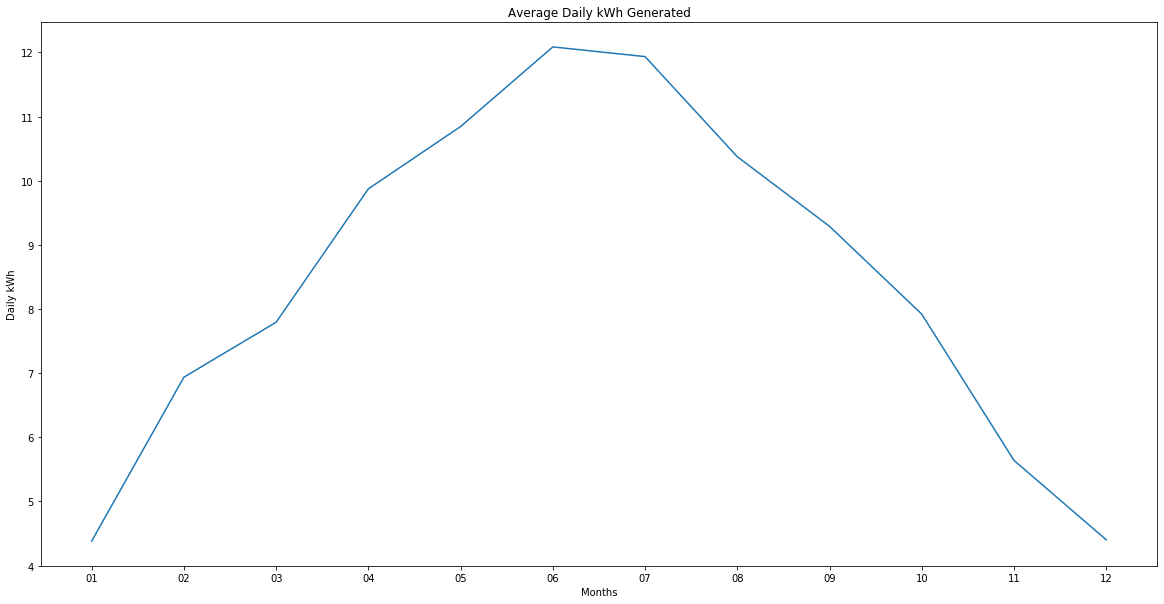

In [8]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(df_daily_average['month'],df_daily_average['daily'])
plt.title("Average Daily kWh Generated")
plt.xlabel("Months")
plt.ylabel("Daily kWh")

### Plotting the Total Generation per Year

Data wrangling

In [9]:
df['Year'] = df['Date'].str[-4:]
df_year_daily = df.groupby(['Year'], as_index=False).sum()
df_year_daily.head(6)

,Year,ID,Net Kwh,DailyGenerations
0,2015,7503,64043,892
1,2016,111813,919165,3173
2,2017,244915,2049880,3065
3,2018,378140,3176235,3071
4,2019,511365,4282289,3044
5,2020,590424,4949910,2911


Plotting bar chart

Text(0, 0.5, 'Years')

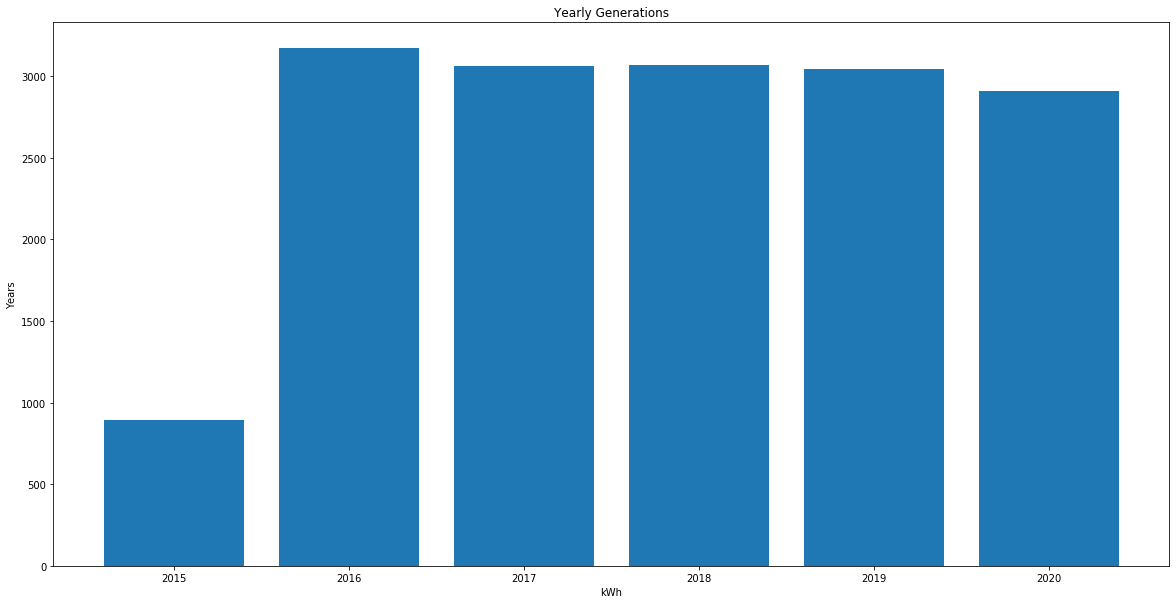

In [10]:
plt.figure(figsize=(20,10))
plt.bar(df_year_daily['Year'],df_year_daily['DailyGenerations'])
plt.title('Yearly Generations')
plt.xlabel("kWh")
plt.ylabel("Years")

### Total Monthly Generation By Year

Data wrangling

In [11]:
df_date = df['Date'].str.split("/", n=2, expand=True)
df_date[0] = df_date[0].apply('{:0>2}'.format)
df_date[1] = df_date[1].apply('{:0>2}'.format)
df_date.head()


df_date['monthDay']=df_date[0]
df_date['dailykWh'] = df['DailyGenerations']
df_date=df_date.drop([0,1], axis=1)

df_date.columns.values[0]='year'
df_year_2015 = df_date[df_date['year']=="2015"]
df_year_2016 = df_date[df_date['year']=="2016"]
df_year_2017 = df_date[df_date['year']=="2017"]
df_year_2018 = df_date[df_date['year']=="2018"]
df_year_2019 = df_date[df_date['year']=="2019"]
df_year_2020 = df_date[df_date['year']=="2020"]

df_daily_average1 = df_year_2015.groupby(['monthDay'], as_index=False).sum()
df_daily_average2 = df_year_2016.groupby(['monthDay'], as_index=False).sum()
df_daily_average3 = df_year_2017.groupby(['monthDay'], as_index=False).sum()
df_daily_average4 = df_year_2018.groupby(['monthDay'], as_index=False).sum()
df_daily_average5 = df_year_2019.groupby(['monthDay'], as_index=False).sum()
df_daily_average6 = df_year_2020.groupby(['monthDay'], as_index=False).sum()

Plotting line graph

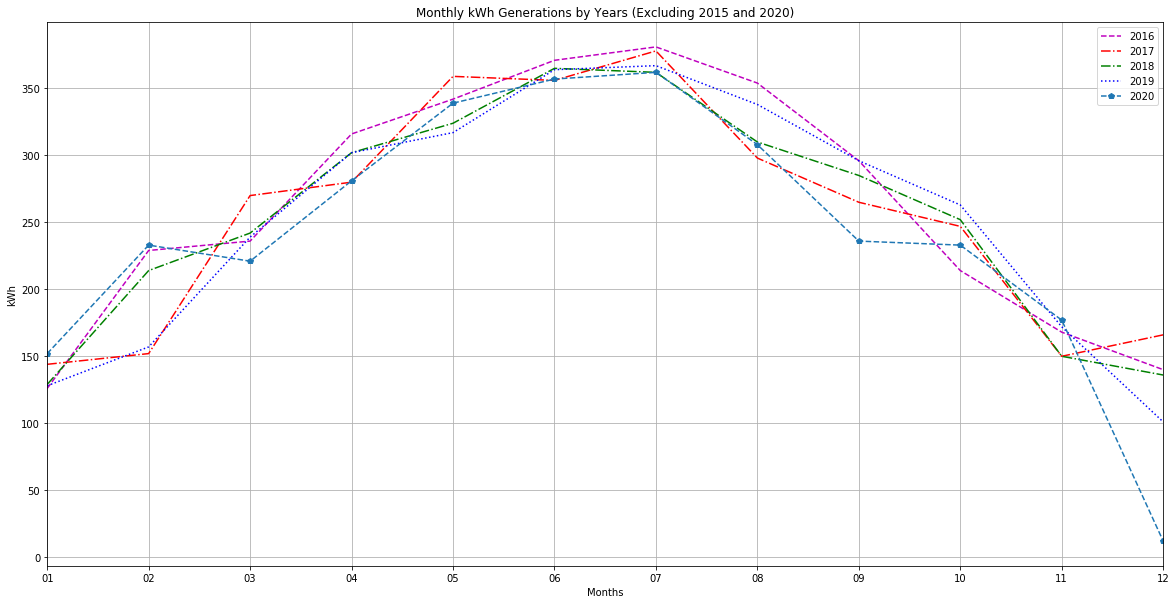

In [12]:
plt.figure(figsize=(20,10))

#plt.plot(df_daily_average1['monthDay'],df_daily_average1['dailykWh'],'-.c',label='2015')
plt.plot(df_daily_average2['monthDay'],df_daily_average2['dailykWh'],'--m',label='2016')
plt.plot(df_daily_average3['monthDay'],df_daily_average3['dailykWh'],'-.r',label='2017')
plt.plot(df_daily_average4['monthDay'],df_daily_average4['dailykWh'],'-.g',label='2018')
plt.plot(df_daily_average5['monthDay'],df_daily_average5['dailykWh'],':b',label='2019')
plt.plot(df_daily_average6['monthDay'],df_daily_average6['dailykWh'],'--p',label='2020')

plt.title('Monthly kWh Generations by Years (Excluding 2015 and 2020)')
plt.xlabel("Months")
plt.ylabel("kWh")

plt.xlim(0,11)
plt.grid()
plt.legend()

## Scattered Plot

In [13]:
df_days = df['Date'].str.split("/", n=2, expand=True)
df_days[1] = df_days[1].apply('{:0>2}'.format)
df_days[0] = df_days[0].astype(float)
df_days[1] = df_days[1].astype(float)
df_days[1] = df_days[1]/31 #days divided by 31 as the max days in a month
df_days['monthday'] = df_days[0]+(df_days[1])
df_days['dailyKwh'] = df['DailyGenerations']
df_days=df_days.drop([0,1,2], axis=1)

df_days.sort_values(by=['monthday'],inplace=True)
df_days.info()
#df_days.head(30)
#df_days.tail()

df_days_ave = df_days.groupby(['monthday'], as_index=False).mean()

df_days_ave.head(35)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 1218 to 1217
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   monthday  1920 non-null   float64
 1   dailyKwh  1920 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 45.0 KB


,monthday,dailyKwh
0,1.032258,5.4
1,1.064516,4.4
2,1.096774,2.8
3,1.129032,3.0
4,1.161290,3.6
5,1.193548,4.0
6,1.225806,3.6
7,1.258065,1.4
8,1.290323,2.0
9,1.322581,3.8


Text(0, 0.5, 'kWh')

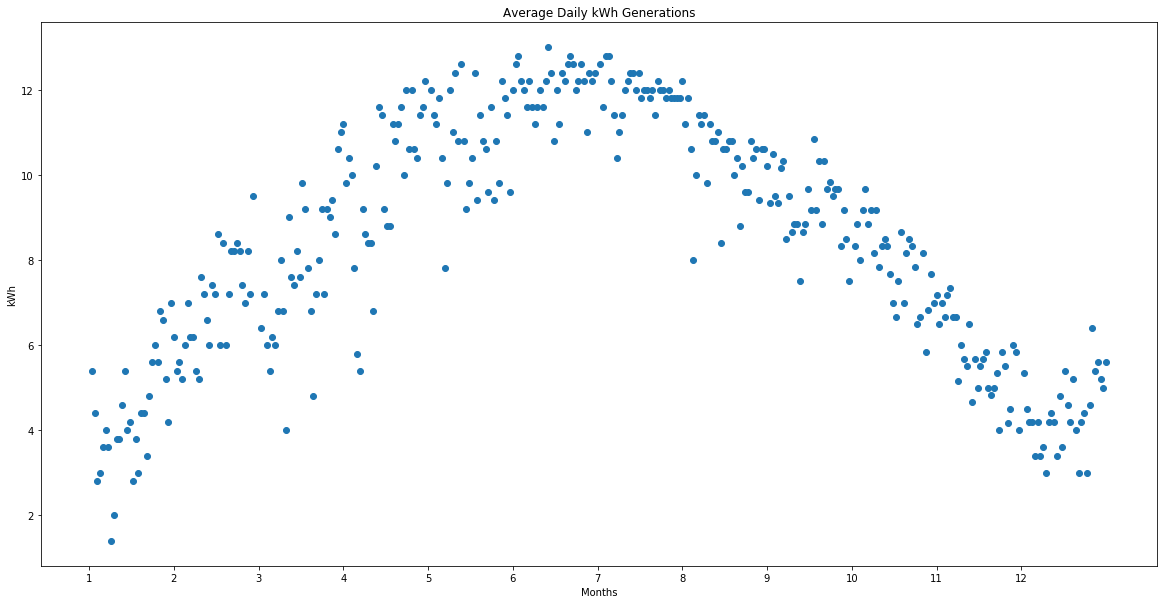

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(df_days_ave['monthday'],df_days_ave['dailyKwh'])
plt.xticks(np.arange(1, 13, step=1))
plt.title('Average Daily kWh Generations')
plt.xlabel("Months")
plt.ylabel("kWh")

## Scattered Plot with Linear Regression

Coefficent: [[-0.04920303]]
Intercept: [8.80524605]
Root Mean Square Erro: 2.8294536722737953
R-Squared: 0.0036169893479440773


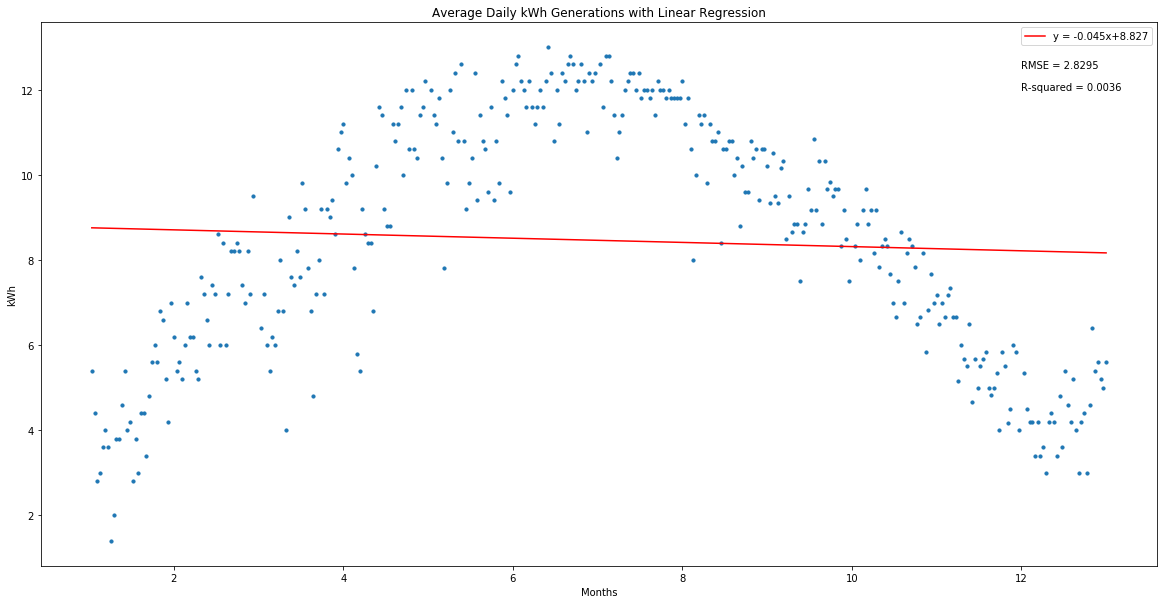

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# transforming the data to include another axis
x = df_days_ave[['monthday']]
y = df_days_ave[['dailyKwh']]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

print("Coefficent:",model.coef_)
print("Intercept:",model.intercept_)

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("Root Mean Square Erro:",rmse)
print("R-Squared:",r2)

plt.figure(figsize=(20,10))
plt.scatter(df_days_ave['monthday'], df_days_ave['dailyKwh'], s=10)
plt.plot(df_days_ave['monthday'], y_pred, color='r',label="y = -0.045x+8.827")
plt.title('Average Daily kWh Generations with Linear Regression')

plt.text(12, 12.5, 'RMSE = %0.4f' % rmse)
plt.text(12, 12, 'R-squared = %0.4f' % r2)

plt.legend()
plt.xlabel("Months")
plt.ylabel("kWh")
plt.show()

## Scattered Plot with 2nd Degree Polynomial Regression

Root Mean Square Error: 1.1335023850695904
R-Square: 0.8400935376354123
Coefficients: [[ 0.          3.32728575 -0.24076625]]
Intercept: [-0.14237279]


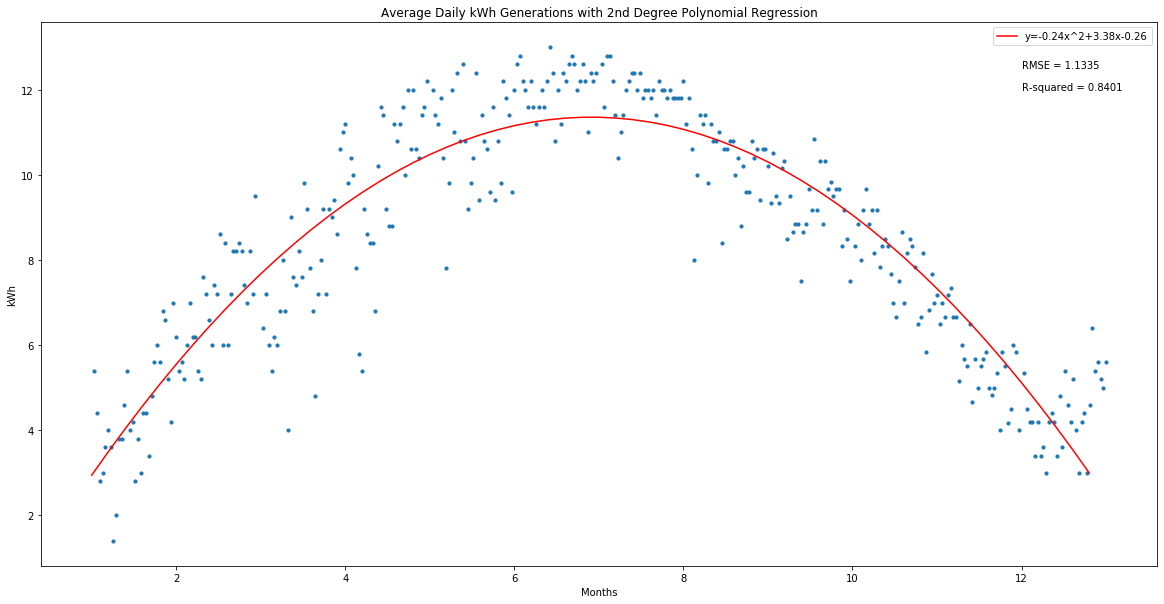

In [16]:
import operator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# transforming the data to include another axis
x = df_days_ave[['monthday']]
x1 = df_days_ave['monthday']
y = df_days_ave[['dailyKwh']]
y1 = df_days_ave['dailyKwh']

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("Root Mean Square Error:",rmse)
print("R-Square:",r2)

print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

plt.figure(figsize=(20,10))
plt.scatter(x1, y1, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

XX = np.arange(1.0, 13.0, 0.2)
poly_func = model.intercept_ + model.coef_[0][1]*XX + model.coef_[0][2]*np.power(XX,2)
plt.plot(XX, poly_func, color='r',label="y=-0.24x^2+3.38x-0.26")

plt.text(12, 12.5, 'RMSE = %0.4f' % rmse)
plt.text(12, 12, 'R-squared = %0.4f' % r2)

plt.title('Average Daily kWh Generations with 2nd Degree Polynomial Regression')
plt.xlabel("Months")
plt.ylabel("kWh")

plt.legend()
plt.show()

Text(0, 0.5, 'kWh')

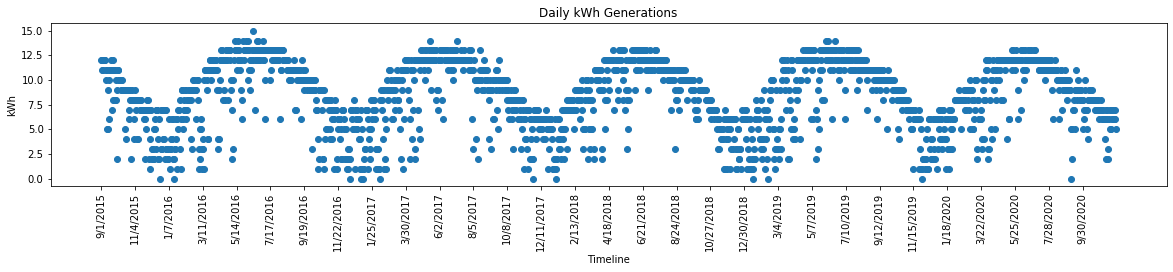

In [17]:
plt.figure(figsize=(20,3))
x = np.arange(0, len(df), step=1)
plt.scatter(df['Date'],df['DailyGenerations'])
plt.title('Daily kWh Generations')
plt.xticks(np.arange(0, len(df), step=(len(df)/30)))
plt.xticks(rotation=90)
plt.xlabel("Timeline")
plt.ylabel("kWh")